In [1]:
"""Задание 1
Взять датасет с цветками ириса
"""

from sklearn.datasets import load_iris 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

from tqdm import notebook
notebook.tqdm().pandas()

iris = load_iris()
print(iris.DESCR)  # получаем информацию о датасете

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [2]:
"""Задание 2. 
Оставить 2 признака - 'sepal length (cm)', 'sepal width (cm)' и целевую переменную  vatiety"""

# вначале выведем исходные данные:
data = pd.DataFrame(iris.data, columns=iris.feature_names)
data_class = iris.target
vatiety = iris.target_names
print('Целевая переменная vatiety: ', vatiety)                  # целевая перменная 
print('Распределение выборки по классам: ', data_class)         # распределение цветков выборки по классам
print('Названия переменных: ', iris.feature_names)              # смотрим названия переменных
print(data)                                                     # датафрейм 


Целевая переменная vatiety:  ['setosa' 'versicolor' 'virginica']
Распределение выборки по классам:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
Названия переменных:  ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 .

In [3]:
# сформируем датасет с нужными прзнаками. 
# Целевая переменная — это сорт Ириса: 0 — Setosa, 1 — Versicolor, 2 — Virginica

vatiety = {'vatiety': data_class}                                          # формируем словарь с ключом vatiety
vatiety_df = pd.DataFrame(vatiety)                                         # из словаря формируем датафрейм
new_df = data[['sepal length (cm)', 'sepal width (cm)']].join(vatiety_df)  # объединяем датафреймы с нужными столбцами
new_df

,sepal length (cm),sepal width (cm),vatiety
0,5.1,3.5,0
1,4.9,3.0,0
2,4.7,3.2,0
3,4.6,3.1,0
4,5.0,3.6,0
...,...,...,...
145,6.7,3.0,2
146,6.3,2.5,2
147,6.5,3.0,2
148,6.2,3.4,2


In [4]:
"""Задание 3. 
Разделить данные на выборку для обучения и тестирования
"""

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data[['sepal length (cm)', 'sepal width (cm)']], data_class, test_size=0.3)

In [5]:
"""Задание 4.
Построить модель LDA (дискриминантный анализ)
"""

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis  # импортируем LDA-функционал

lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)                                             # обучаем данные
lda.predict(X_test)                                                   # делаем прогноз на тестовой выборке

array([1, 1, 2, 0, 1, 2, 1, 0, 1, 2, 2, 2, 0, 1, 0, 1, 2, 0, 2, 0, 0, 2,
       0, 1, 0, 1, 0, 0, 2, 1, 0, 2, 2, 1, 1, 1, 0, 2, 0, 2, 2, 0, 2, 2,
       1])

In [6]:
# смотрим разницу факта и прогноза
result = pd.DataFrame([y_test, lda.predict(X_test)]).T
result

,0,1
0,2,1
1,2,1
2,2,2
3,0,0
4,1,1
5,1,2
6,1,1
7,0,0
8,1,1
9,2,2


In [7]:
# рассчитаем точность прогноза - отношение верных прогнозов к общему количеству позиций:

from sklearn.metrics import accuracy_score
accuracy_score(y_test, lda.predict(X_test))

0.8444444444444444

[[4.96       3.38571429]
 [5.97837838 2.77567568]
 [6.54545455 2.96666667]]


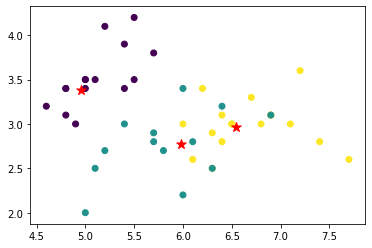

In [8]:
"""Задание 5.
Визуализировать предсказания для тестовой выборки;
визуализировать центры классов
(разделяющую плоскость можно не строить, но следует обратить внимание, что классов - 3)
"""

# коэффициенты дискриминатных линий
lda.coef_

# визуализируем дискриминантную линию для тестовой выборки только по 2 признакам
plt.scatter(X_test['sepal length (cm)'], X_test['sepal width (cm)'], c=y_test)
# plt.show()

# считаем центры классов
print(lda.means_)

# изобразим в виде звездочек центроиды на графике
plt.scatter(lda.means_[:, 0], lda.means_[:, 1], c='r', s=100, marker='*')


In [9]:
"""Задание 6.
Отбросить целевую переменную и оставить только 2 признака.
"""

new_df_sepal = data[['sepal length (cm)', 'sepal width (cm)']]
new_df_sepal

,sepal length (cm),sepal width (cm)
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
...,...,...
145,6.7,3.0
146,6.3,2.5
147,6.5,3.0
148,6.2,3.4


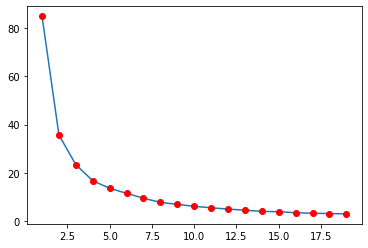

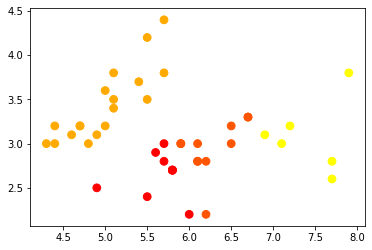

In [10]:
"""Задание 7.
Подобрать оптимальное число кластеров для алгоритма kmeans 
и визуализировать полученную кластеризацию
"""

from sklearn.cluster import KMeans

X_train, X_test, y_train, y_test = (train_test_split(data[['sepal length (cm)', 'sepal width (cm)']], 
                                                                      data_class, test_size=0.3))

# количество кластеров оптимально - 4. Чтобы получить этот результат, построим график локтя и 
# на его основе увидим, после какого количества кластеров отрезок на кривой перестает как-либо значительно изменяться 

k_inertia = []                                           # создаем список для инерции
ks = range(1, 20)                                        # задаем диапазон для перебора количества кластеров

for k in ks:
    model = KMeans(n_clusters=k)
    clusters_kmeans_fit = model.fit(X_train)
    clusters_kmeans_predict = model.predict(X_test)
    k_inertia.append(model.inertia_)                     # добавляем инерцию каждой модели в список

plt.plot(ks, k_inertia)
plt.plot(ks, k_inertia ,'ro')
plt.show()

model=KMeans(n_clusters=4)
model.fit(X_train)
clusters_kmeans_predict = model.predict(X_test)
plt_predict = plt.scatter(X_test.iloc[:, 0], X_test.iloc[:, 1], cmap='autumn', c=clusters_kmeans_predict, s=60)
plt.show()
